# Chapter 2 | K-nearest neighbors (KNN)

This Jupyter Notebook is a supplement for the [Machine Learning For Everyone](ml4everyonebook.com) book.

> Let's recall what we covered in Chapter 2. We have a hypothetical data table containing 20 fruits that are a mix of `apples`, `mandarins`, and `lemons` For each fruit, we have measured it’s `height` and `width` and recorded them as the first two columns of the table. For each fruit we know its `type`, or class label, and this is represented by the last column:

| height | width | fruit |
| ----------- | ----------- | ----------- |
| 3.91 | 5.76 | Mandarin |
| 7.09 | 7.69 | Apple |
| 10.48 | 7.32 | Lemon |
| 9.21 | 7.20 | Lemon |
| 7.95 | 5.90 | Lemon |
| 4.30 | 5.88 | Mandarin |
| 7.62 | 7.51 | Apple |
| 8.42 | 5.99 | Lemon |
| 7.15 | 7.43 | Apple |
| 4.69 | 6.19 | Mandarin |
| 7.50 | 5.99 | Lemon |
| 7.11 | 7.02 | Apple |
| 4.15 | 5.60 | Mandarin |
| 7.29 | 8.38 | Apple |
| 8.49 | 6.52 | Lemon |
| 7.44 | 7.89 | Apple |
| 7.86 | 7.60 | Apple |
| 4.40 | 5.90 | Mandarin |
| 8.10 | 6.15 | Lemon |
| 8.69 | 5.82 | Lemon |

> The structure of this notebook is identical to the structure of Chapter 2: Overview of Supervised Learning. That means, we will sequentially:

> 1. re-create a hypothetical data table with fruits measurements in Python
> 2. visualize the dataset in the graph
> 2. build a KNN classifier by training it with the dataset
> 4. predict new values with classifier
> 5. visualize decision boundaries of KNN classifier
> 6. 

# 1. Load libraries and functions that we will need

In [22]:
import matplotlib.pyplot as plt # Load matplotlib library for visualization
from matplotlib.colors import ListedColormap
import pandas as pd  #import pandas for data manipulations
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

def plotFruitFigure():
    # Define variables for graph
    apple_height, apple_width = df.height[df.fruit == 'Apple'], df.width[df.fruit == 'Apple']
    mandarin_height, mandarin_width = df.height[df.fruit == 'Mandarin'], df.width[df.fruit == 'Mandarin']
    lemon_height, lemon_width = df.height[df.fruit == 'Lemon'], df.width[df.fruit == 'Lemon']

    # Initialize the graph
    fig, ax = plt.subplots()
    plt.gca().set_aspect('equal', adjustable='box')

    # Plot defined variables on it
    ax.plot(apple_height, apple_width, 'o', color='r', label='apple')
    ax.plot(mandarin_height, mandarin_width, 'o', color='g', label='mandarin')
    ax.plot(lemon_height, lemon_width, 'o', color='b', label='lemon')

    # Show legend and configure graph's size
    plt.legend()
    plt.ylim(3, 10) 
    plt.xlim(3, 11)
    

def plotKNN(
    n_neighbors=int, 
            plot_data=True,
            plot_height=None,
            plot_width=None,
            plot_labels=None 
#            n_neighbors=int,
#            plot_data=True
):
    
#     plot_height = df['height']
#     plot_width = df['width']
#     plot_labels=df.fruit.values
    
    # Turn categorical target variable into numerical to make a graph
    X = df[['height', 'width']].values
    y_encoded = df["fruit"].astype('category').cat.codes #encoded y


    # Create color maps for graph
    cmap_light = ListedColormap(['pink', 'lightblue', 'lightgreen'])
    cmap_bold = ['green', 'red', 'blue']

    # We want to visualize KNN with 1 nearest neighbor.
    # Let's initialize the model and train it with the dataset
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X, y_encoded)

    # Plot the decision boundary. For that, we will assign a color to each point in the mesh
    x_min, x_max = X[:, 0].min() - 3, X[:, 0].max() + 3
    y_min, y_max = X[:, 1].min() - 3, X[:, 1].max() + 3

    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    
    if plot_data==True:
        # Plot also the dataset observations
        sns.scatterplot(x=plot_height, 
                        y=plot_width,#y=X[:, 1], 
                        hue=plot_labels,#df.fruit.values,
                        palette=cmap_bold, 
                        alpha=1.0, 
                        edgecolor="black")

    # Configure the graph
    plt.ylim(3, 10) 
    plt.xlim(3, 11)
    plt.gca().set_aspect('equal', adjustable='box')

    plt.title(f'KNN Fruits Classifier, n={n_neighbors}')
    plt.xlabel("height")
    plt.ylabel("width")  

# 2. Dataset

## 2.1. Compose the table

> To create a table, we use `pandas` library - a library that manages **PAN**el **DA**ta **S**ets.

In [23]:
# Import pandas 
import pandas as pd  

# Create a hypothetical dataset from the book
data = {'height': [3.91, 7.09, 10.48, 9.21, 7.95, 4.30, 7.62, 8.42, 7.15, 4.69, 7.50, 7.11, 4.15, 7.29, 8.49, 7.44, 7.86, 4.40, 8.10, 8.69], 
        'width': [5.76, 7.69, 7.32, 7.20, 5.90, 5.88, 7.51, 5.99, 7.43, 6.19, 5.99, 7.02, 5.60, 8.38, 6.52, 7.89, 7.60, 5.90, 6.15, 5.82],
        'fruit': ['Mandarin', 'Apple', 'Lemon', 'Lemon', 'Lemon', 'Mandarin', 'Apple', 'Lemon', 'Apple', 'Mandarin', 'Lemon', 'Apple', 'Mandarin', 'Apple', 'Lemon', 'Apple', 'Apple', 'Mandarin', 'Lemon', 'Lemon']
       }  

# Create DataFrame df using pandas library
df = pd.DataFrame(data)  
  
# Print the output
df

,height,width,fruit
0,3.91,5.76,Mandarin
1,7.09,7.69,Apple
2,10.48,7.32,Lemon
3,9.21,7.20,Lemon
4,7.95,5.90,Lemon
5,4.30,5.88,Mandarin
6,7.62,7.51,Apple
7,8.42,5.99,Lemon
8,7.15,7.43,Apple
9,4.69,6.19,Mandarin


## 2.2. Visualize data points

> Let's now make the same graph that we had in the book.

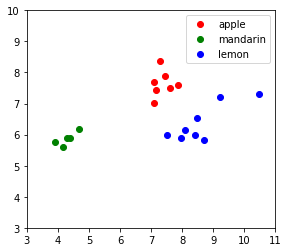

In [3]:
plotFruitFigure()

# 3. Learning a Prediction Function

## 3.1. Build a KNN Classifier

> Let's build a classifier and use it to predict some values. Firstly, we define `X` and `y`:

In [4]:
# Define X and y using the dataset

X = df[['height', 'width']].values
y = df.fruit.values


> Second, we **initialize** our `KNN` algorithm and **train** it with X and y.

In [6]:
# Import a KNN library
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model with 1 nearest neighbor
clf = KNeighborsClassifier(n_neighbors = 1)

# Feed the dataset into the model to train
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

## 3.2. Vizualize KNN decision boundaries

> Let's visualize the decision boundaries of KNN in a graph, like we did in the book.

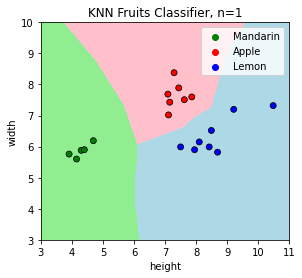

In [27]:
plotKNN(n_neighbors=1, 
        plot_height= df['height'], 
        plot_width = df['width'], 
        plot_labels=df.fruit.values)

## 3.3. Predict unknown values

> Let's predict unknown fruits using our trained classifier:

In [60]:
# Let's try to predict the label for an unknown fruit with width of 9cm and height of 3cm
clf.predict([[9, 3]])

array(['Lemon'], dtype=object)

In [44]:
# We can predict values for a whole bunch of them!
clf.predict([[9, 3], [4, 5], [2, 5], [8, 9], [5, 7]])

array(['Lemon', 'Mandarin', 'Mandarin', 'Apple', 'Mandarin'], dtype=object)

# 4. How Good is our Prediction Function?

Training and Test error curves as we vary the hyper-parameter K, the number of neighbors. The left shows an under-fit model which uses too large of a neighborhood K = n. The right of the plot shows an over-fit model which uses too small of a neighborhood K = 1.

## 4.1. Add outliers

In [45]:
# Create a hypothetical dataset from the book
data = {'height': [3.91, 7.09, 10.48, 9.21, 7.95, 4.30, 7.62, 8.42, 7.15, 4.69, 7.50, 7.11, 4.15, 7.29, 8.49, 7.44, 7.86, 4.40, 8.10, 8.69], 
        'width': [5.76, 7.69, 7.32, 7.20, 5.90, 5.88, 7.51, 5.99, 7.43, 6.19, 5.99, 7.02, 5.60, 8.38, 6.52, 7.89, 7.60, 5.90, 6.15, 5.82],
        'fruit': ['Mandarin', 'Apple', 'Lemon', 'Lemon', 'Lemon', 'Mandarin', 'Apple', 'Lemon', 'Apple', 'Mandarin', 'Lemon', 'Apple', 'Mandarin', 'Apple', 'Lemon', 'Apple', 'Apple', 'Mandarin', 'Lemon', 'Lemon']
       }  
df = pd.DataFrame(data) 

new_data = {'height': [7.95, 3.93, 5.5],
            'width': [5.32, 6.12, 4.5],
            'fruit': ['Mandarin', 'Apple', 'Lemon']
           }

# Create DataFrame df using pandas library
new_points = pd.DataFrame(new_data)  
  
# Print the output
df = pd.concat([df, new_points])

> Visualize

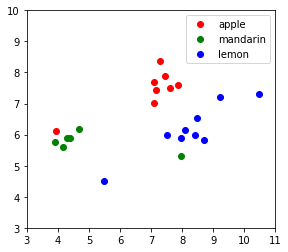

In [72]:
plotFruitFigure()

## 4.2. Train KNN

In [77]:
# Import a KNN library
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model with 1 nearest neighbor
clf = KNeighborsClassifier(n_neighbors = 1)

# Define X and y using the dataset

X = df[['height', 'width']].values
y = df.fruit.values

# Feed the dataset into the model to train
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

> Visualize decision boundaries

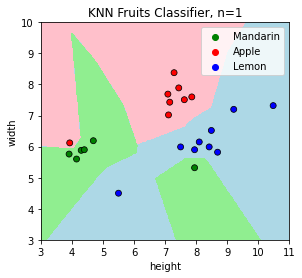

In [48]:
plotKNN(n_neighbors=1, 
        plot_height= df['height'], 
        plot_width = df['width'], 
        plot_labels=df.fruit.values)

> Plot the model

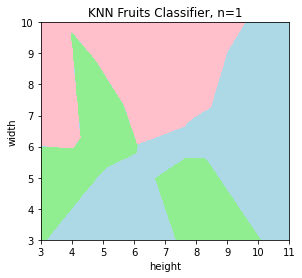

In [21]:
plotKNN(n_neighbors=1, plot_data=False)

## 4.3. Test the model

### 4.2.1. Evaluate on Train Set

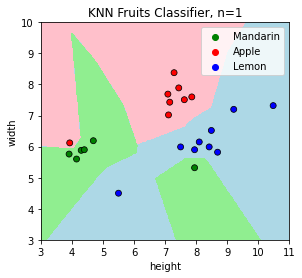

In [73]:
plotKNN(n_neighbors=1, 
        plot_height= df['height'], 
        plot_width = df['width'], 
        plot_labels=df.fruit.values)

### 4.2.2. Evaluate on Test Set

> Imagine we have new fuits with the following properties:

| height | width | fruit |
| ----------- | ----------- | ----------- |
| 6.5 | 7 | Apple |
| 7.5 | 5 | Lemon |
| 4 | 6.5 | Mandarin |

> Let's see if our model would correctly predict the fruit label by showing fruits' measurements and not revealing their labels. Let's pick 6 nearest neighbors:

In [298]:
# test_data = pd.DataFrame({'height': [4, 6.5, 7.5],
#             'width': [6.5, 7, 5],
#             'fruit': ['Mandarin', 'Apple', 'Lemon']
#            })

test_data = pd.DataFrame({'height': [4, 6.5, 7.5, 6],
            'width': [6.5, 7, 5, 7.5],
            'fruit': ['Mandarin', 'Apple', 'Lemon', 'Mandarin']
           })


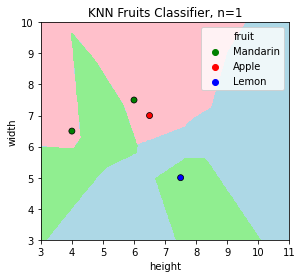

In [299]:
plotKNN(n_neighbors=1, 
        plot_height=test_data.height,
        plot_width=test_data.width,
        plot_labels=test_data.fruit)

> You can see that the model failed to..

In [297]:
# Predict observations
for i in range(len(test_data)):
    
    # Initialize the KNN model with 1 nearest neighbor
    clf = KNeighborsClassifier(n_neighbors = 1)

    # Define X and y using the dataset
    X = df[['height', 'width']].values
    y = df.fruit.values

    # Feed the dataset into the model to train
    clf.fit(X, y)
    
    pred = clf.predict([test_data.iloc[i, :-1]])
    
    if pred == test_data.fruit[i]:
        print(f'[CORRECT!] - actual observation is {test_data.fruit[i]}, and the model predicted {pred}')
    else:
        print(f'[WRONG!] - actual observation is {test_data.fruit[i]}, but the model predicted {pred}')

[WRONG!] - actual observation is Mandarin, but the model predicted ['Apple']
[CORRECT!] - actual observation is Apple, and the model predicted ['Apple']
[WRONG!] - actual observation is Lemon, but the model predicted ['Mandarin']
[WRONG!] - actual observation is Mandarin, but the model predicted ['Apple']


> The model incorrectly predicted the second observation. This is called misclassification - the model predicted the label that was actually incorrect. That reminds me to go further and explain how do we test our model after it was trained. 

# 5. Model Complexity

## K = 1

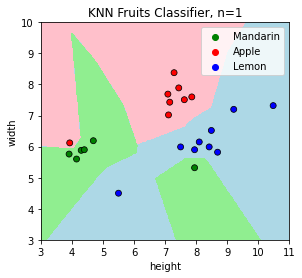

In [137]:
plotKNN(n_neighbors=1, 
        plot_height= df['height'], 
        plot_width = df['width'], 
        plot_labels=df.fruit.values)

## Test data

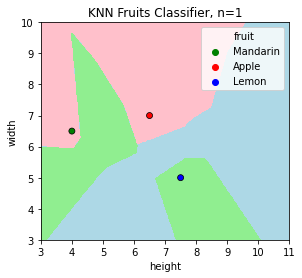

In [138]:
plotKNN(n_neighbors=1, 
        plot_height=test_data.height,
        plot_width=test_data.width,
        plot_labels=test_data.fruit)

## K = 2

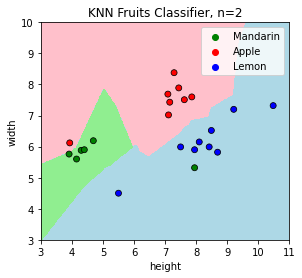

In [25]:
plotKNN(n_neighbors=2, 
        plot_height= df['height'], 
        plot_width = df['width'], 
        plot_labels=df.fruit.values)

## Test Data

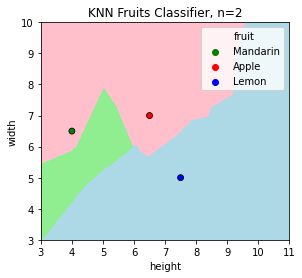

In [139]:
plotKNN(n_neighbors=2, 
        plot_height=test_data.height,
        plot_width=test_data.width,
        plot_labels=test_data.fruit)

## K = 5

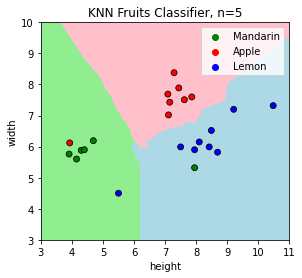

In [26]:
plotKNN(n_neighbors=5, 
        plot_height= df['height'], 
        plot_width = df['width'], 
        plot_labels=df.fruit.values)

## Test Data

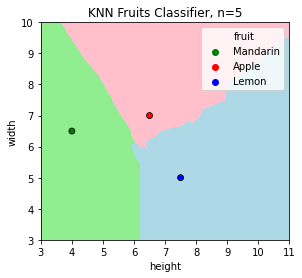

In [140]:
plotKNN(n_neighbors=5, 
        plot_height=test_data.height,
        plot_width=test_data.width,
        plot_labels=test_data.fruit)

## K = N

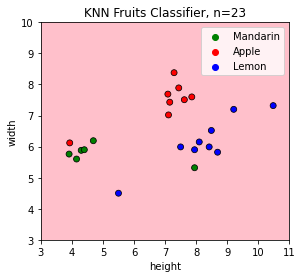

In [101]:
n = len(X)

plotKNN(n_neighbors=n, 
        plot_height= df['height'], 
        plot_width = df['width'], 
        plot_labels=df.fruit.values)

# 6. Building Model Complexity Graph

In [300]:
test_data = pd.DataFrame({'height': [4, 6.5, 7.5, 6],
            'width': [6.5, 7, 5, 7.5],
            'fruit': ['Mandarin', 'Apple', 'Lemon', 'Mandarin']
           })


In [301]:
clf = KNeighborsClassifier(n_neighbors = 2)
clf.fit(X, y)
y_pred_test = clf.predict(test_data[['height', 'width']])

In [327]:
# Define X and y using the dataset
X = df[['height', 'width']].values
y = df.fruit.values
test_n=len(test_data)
train_n=len(df)

train_scores = []
test_scores = []
k = []
test_misclassifications = []
train_misclassifications = []

for i in range(len(X)):
    _k = i+1
    # # STEP 2: Again, initialize the model
    clf = KNeighborsClassifier(n_neighbors = _k)
    clf.fit(X, y)

    # STEP 3: make predictions on the testing set
    y_pred_train = clf.predict(X)
    y_pred_test = clf.predict(test_data[['height', 'width']])

    # STEP 4: compare actual response values (y_test) with predicted response values (y_pred)
    k.append(i)
    train_score = round(metrics.accuracy_score(y, y_pred_train), 2)
    test_score = round(metrics.accuracy_score(test_data[['fruit']], y_pred_test), 2)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    test_misclassifications.append(test_n-test_scores[i]*test_n)
    train_misclassifications.append(int(train_n-train_scores[i]*train_n))
    
    print(f'k={_k} | test misclassifications: {test_misclassifications[i]} | train misclassifications: {train_misclassifications[i]} | train score: {train_scores[i]} | test score: {test_scores[i]}')
    
    

k=1 | test misclassifications: 3.0 | train misclassifications: 0 | train score: 1.0 | test score: 0.25
k=2 | test misclassifications: 2.0 | train misclassifications: 0 | train score: 0.96 | test score: 0.5
k=3 | test misclassifications: 1.0 | train misclassifications: 2 | train score: 0.87 | test score: 0.75
k=4 | test misclassifications: 1.0 | train misclassifications: 2 | train score: 0.87 | test score: 0.75
k=5 | test misclassifications: 1.0 | train misclassifications: 2 | train score: 0.87 | test score: 0.75
k=6 | test misclassifications: 1.0 | train misclassifications: 2 | train score: 0.87 | test score: 0.75
k=7 | test misclassifications: 1.0 | train misclassifications: 2 | train score: 0.87 | test score: 0.75
k=8 | test misclassifications: 1.0 | train misclassifications: 2 | train score: 0.87 | test score: 0.75
k=9 | test misclassifications: 1.0 | train misclassifications: 2 | train score: 0.87 | test score: 0.75
k=10 | test misclassifications: 1.0 | train misclassifications: 2 

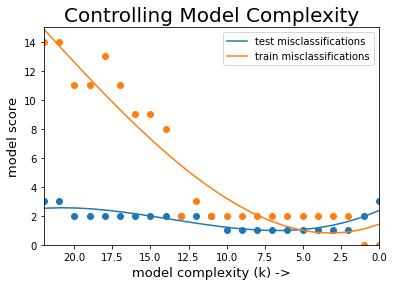

In [338]:
import numpy as np

# x = np.array(k)
# y = np.array(test_scores)

degrees = 3
p1 = np.poly1d(np.polyfit(k, test_misclassifications, degrees))
p2 = np.poly1d(np.polyfit(k, train_misclassifications, degrees))

t = np.linspace(0, 25, 25)

plt.scatter(k, test_misclassifications)
plt.plot(t, p1(t), '-', label='test misclassifications')

plt.scatter(k, train_misclassifications)
plt.plot(t, p2(t), '-', label='train misclassifications')


plt.axis([max(x),min(x), 0, 15])
plt.xlabel('model complexity (k) ->', size = 13)
plt.ylabel('model score', size = 13)
plt.title('Controlling Model Complexity', size = 20)
plt.legend()

plt.show()

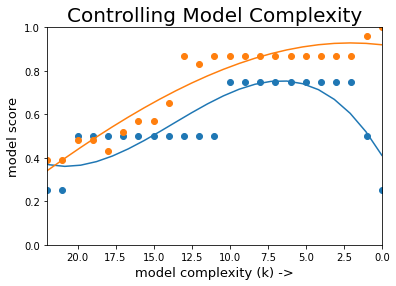

In [340]:
import numpy as np

# x = np.array(k)
# y = np.array(test_scores)

degrees = 3
p1 = np.poly1d(np.polyfit(k, test_scores, degrees))
p2 = np.poly1d(np.polyfit(k, train_scores, degrees))

t = np.linspace(0, 25, 25)

plt.scatter(k, test_scores)
plt.plot(t, p1(t), '-')

plt.scatter(k, train_scores)
plt.plot(t, p2(t), '-')


plt.axis([max(x),min(x), 0, 1])
plt.xlabel('model complexity (k) ->', size = 13)
plt.ylabel('model score', size = 13)
plt.title('Controlling Model Complexity', size = 20)

plt.show()

(0.0, 22.0)

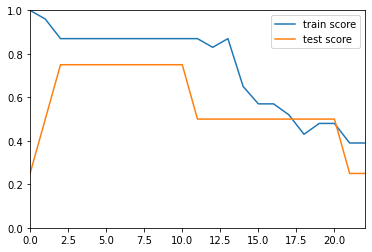

In [158]:
# Load matplotlib library for visualization
import matplotlib.pyplot as plt

# Initialize the graph
fig, ax = plt.subplots()
# plt.gca().set_aspect('equal', adjustable='box')

# Plot defined variables on it
ax.plot(k, train_scores, label='train score')
ax.plot(k, test_scores, label='test score')
# ax.plot(lemon_height, lemon_width, 'o', color='b', label='lemon')

# Show legend and configure graph's size
plt.legend()
plt.ylim(0, 1) 
plt.xlim(0, 22)

## 3.5. Train test curve

> Testing the model is just a procedure to evaluate model's accuracy. It's done by comparing model's predicted values with actual results. 

In [11]:
# First, we predict labels for X
y_pred = clf.predict(X)
print(f'predicted labels: \n\n {y_pred}')

predicted labels: 

 ['Mandarin' 'Apple' 'Lemon' 'Lemon' 'Lemon' 'Mandarin' 'Apple' 'Lemon'
 'Apple' 'Mandarin' 'Lemon' 'Apple' 'Mandarin' 'Apple' 'Lemon' 'Apple'
 'Apple' 'Mandarin' 'Lemon' 'Lemon']


> `y_pred` is predicted by the model fruit labels. Because we also know actual labels `y`:

In [12]:
print(f'actual labels: \n\n {y}')

actual labels: 

 ['Mandarin' 'Apple' 'Lemon' 'Lemon' 'Lemon' 'Mandarin' 'Apple' 'Lemon'
 'Apple' 'Mandarin' 'Lemon' 'Apple' 'Mandarin' 'Apple' 'Lemon' 'Apple'
 'Apple' 'Mandarin' 'Lemon' 'Lemon']


> We can easily calculate the difference between predicted and actual values. The more the difference between these two, the worse the model is at correct predictions. We can use a ready-to-use library from sklearn called `metrics`

In [13]:
# Load metrics
from sklearn import metrics

# Give y and y_pred
print(metrics.accuracy_score(y, y_pred))

1.0


> 1 means 100% accuracy. Hold on.. That's because we tested the model with the same dataset `X` that we used to train it! In other words, we tried to predict the values (that's `y_pred = clf.predict(X)`) that we used to train the model (`clf.fit(X, y)`). 

> The model is always tested on the observations it has not seen before, i.e. observations that did not participate in model training. One of the ways is to split the dataset into **two chunks** of data, and then use one chunk to train the model, and another one to test it. 

In [14]:
y_encoded = df["fruit"].astype('category').cat.codes #encoded

# STEP 1: Split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,       # specifying X
                                                    y_encoded,  # specifying y
                                                    test_size=0.4 #split dataset into 60% training and 40% testing
                                                   )

> let's train our classifier

In [15]:
# # STEP 2: Again, initialize the model
clf = KNeighborsClassifier(n_neighbors = 1)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
# STEP 3: make predictions on the testing set
y_pred = clf.predict(X_test)

In [17]:
# STEP 4: compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

1.0
